### SUPPORT VECTOR MACHINE REGRESSION

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
path = '/Users/francescavasta/Desktop/ADSEM/II YEAR I SEM/UE 2 - Machine Learning /Machine Learning - TAXI PROJECT/data_clean.csv'
df_original = pd.read_csv(path)

In [3]:
# Overview of variables and NAs
list(df_original)
df_original.info()
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 100.0+ KB


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Trip_Price_log
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,27.093997,2.497457,3.501745,1.242601,0.312278,64.034102,57.552115,3.069638,3.896462
std,20.176399,1.082044,0.848856,0.474686,0.250331,35.955663,41.553535,0.795551,0.583602
min,1.230000,1.000000,2.010000,0.336846,0.078955,5.010000,2.601000,0.802002,1.281212
25%,12.185000,2.000000,2.770000,0.855000,0.190000,36.420000,33.390700,2.579079,3.537786
50%,25.630000,3.000000,3.500522,1.210000,0.290000,62.170000,50.241200,3.282038,3.936544
75%,38.340000,3.000000,4.200000,1.610000,0.400000,89.640000,69.577450,3.672242,4.256710
max,146.067047,4.000000,5.000000,5.262560,4.995513,323.485000,332.043689,4.990889,5.808274


In [4]:
# Create a copy to avoid modifying the original dataframe
df_linear_model = df_original.copy()

# Drop the original log transformed columns
df_linear_model = df_linear_model.drop(['Trip_Distance_km_log', 'Trip_Price_log'], axis=1)

In [5]:
# Create dummy variables for categorical columns
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Create dummies and drop first category for each variable
for column in categorical_columns:
    dummies = pd.get_dummies(df_linear_model[column], prefix=column, drop_first=True)
    df_linear_model = pd.concat([df_linear_model, dummies], axis=1)
    df_linear_model = df_linear_model.drop(column, axis=1)

df_linear_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           983 non-null    float64
 1   Passenger_Count            983 non-null    float64
 2   Base_Fare                  983 non-null    float64
 3   Per_Km_Rate                983 non-null    float64
 4   Per_Minute_Rate            983 non-null    float64
 5   Trip_Duration_Minutes      983 non-null    float64
 6   Trip_Price                 983 non-null    float64
 7   Time_of_Day_Evening        983 non-null    bool   
 8   Time_of_Day_Morning        983 non-null    bool   
 9   Time_of_Day_Night          983 non-null    bool   
 10  Day_of_Week_Weekend        983 non-null    bool   
 11  Traffic_Conditions_Low     983 non-null    bool   
 12  Traffic_Conditions_Medium  983 non-null    bool   
 13  Weather_Rain               983 non-null    bool   

In [6]:
#Scale numerical features only (not using log)
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


#set the scaler 
scaler = StandardScaler()
df_model_scaled = df_linear_model.copy()
df_model_scaled[numerical_columns] = scaler.fit_transform(df_linear_model[numerical_columns])

X = df_model_scaled.drop('Trip_Price', axis=1)
y = df_model_scaled['Trip_Price']

# Transform booleans in integer for better handling
bool_columns = X.select_dtypes(include='bool').columns
X[bool_columns] = X[bool_columns].astype(int)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train the model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

Here are the key SVM parameters you can experiment with:

- a. Kernel Type (kernel)
'linear': Useful when the data is linearly separable.
'rbf': Radial Basis Function (default), good for non-linear relationships.
'poly': Polynomial kernel.
'sigmoid': Sigmoid kernel.
- b. Regularization Parameter (C)
Controls the trade-off between a smooth decision boundary and classifying training points correctly.
A high C value gives a smaller margin but tries to classify every training point correctly (low bias, high variance).
A low C value gives a larger margin but might misclassify some training points (high bias, low variance).
- c. Kernel Coefficient (gamma)
The 'gamma' parameter defines how much influence a single training point has. A low value makes the model smoother, while a high value allows it to fit the training data more closely.
Low gamma: The model is too simple and has high bias.
High gamma: The model overfits the training data (high variance).
- d. Epsilon (epsilon)
Defines a margin of tolerance where no penalty is given for errors. It’s used in epsilon-SVR for regression tasks.
A small epsilon leads to a model that follows the training data very closely.
- e. Degree (degree) (only for 'poly' kernel)
The degree of the polynomial kernel function. A higher degree leads to more flexibility, which can lead to overfitting.
You can perform grid search or randomized search to find the best hyperparameters

In [9]:
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
#print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.3229
R-squared: 0.7580


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
#Support vectors (if the model is fitted with support vectors)
print("\nSupport Vectors:", svm_model.support_vectors_.shape)


Support Vectors: (520, 14)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


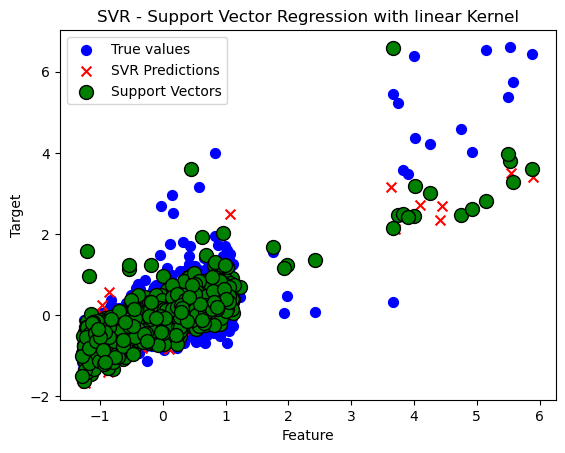

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import pandas as pd

#Plotting the graph of Support Vectors
svm_model.fit(X_train, y_train)

# extract support vectors
sv = svm_model.support_vectors_

# Make predictions using X_test
y_pred = svm_model.predict(X_test)


# Plot predictions (using X_train e y_train to compare with true values)
plt.scatter(X_train.iloc[:, 0], y_train, c='blue', label="True values", s=50, marker='o')  # .iloc to access to columns
plt.scatter(X_test.iloc[:, 0], y_pred, c='red', label="SVR Predictions", s=50, marker='x')

# plot support vectors (2D visualization)
plt.scatter(sv[:, 0], svm_model.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

plt.xlabel("Feature") 
plt.ylabel("Target")
plt.title("SVR - Support Vector Regression with linear Kernel")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


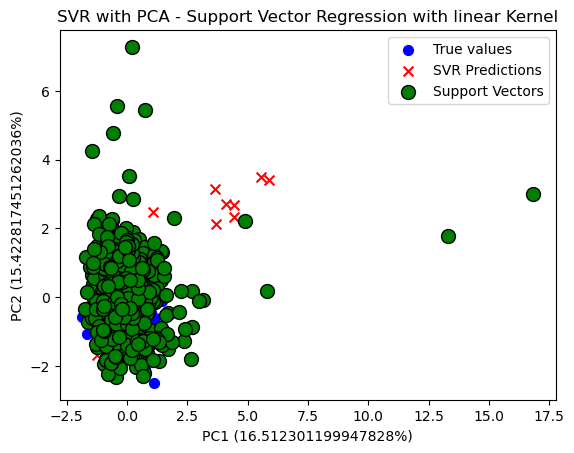

In [12]:
from sklearn.decomposition import PCA

# Use PCA to reduce the predictors' space to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Predictions using PCA
y_pred = svm_model.predict(X_test)

# Find the Support Vectors in the new 2D space
sv = svm_model.support_vectors_
sv_2d = pca.transform(sv)

# Plot the data
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='blue', label="True values", s=50, marker='o')
plt.scatter(X_test.iloc[:, 0], y_pred, c='red', label="SVR Predictions", s=50, marker='x')

# Visualize the Support Vectors in the new 2D space
plt.scatter(sv_2d[:, 0], sv_2d[:, 1], color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

plt.xlabel('PC1 ({}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title("SVR with PCA - Support Vector Regression with linear Kernel")
plt.legend()
plt.show()


In [13]:
# Loadings (how each variabile contributes to the PCA)
loadings = pd.DataFrame(pca.components_.T,  
                        columns=['PC1', 'PC2'],  
                        index=X_train.columns)  

print("Loadings of PCA:")
print(loadings)

Loadings of PCA:
                                PC1       PC2
Trip_Distance_km           0.381527 -0.095141
Passenger_Count           -0.394255 -0.080945
Base_Fare                  0.196681 -0.334364
Per_Km_Rate                0.093861  0.746541
Per_Minute_Rate            0.773585  0.149178
Trip_Duration_Minutes     -0.222517  0.535181
Time_of_Day_Evening        0.000024 -0.009737
Time_of_Day_Morning        0.004635  0.038081
Time_of_Day_Night          0.002489 -0.006505
Day_of_Week_Weekend       -0.029794 -0.014192
Traffic_Conditions_Low     0.031065  0.058927
Traffic_Conditions_Medium -0.039580 -0.031232
Weather_Rain               0.010610  0.011539
Weather_Snow              -0.000601  0.015211


## SVR with CV PARAMETERS

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'epsilon': [0.1, 0.5, 1]
}

# Grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_svm = grid_search.best_estimator_


In [148]:
# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Best parameters and performance
print("Best parameters found: ", grid_search.best_params_)
#print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error: {mse:.4f}")
#print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")



Best parameters found:  {'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.1659
R-squared: 0.8756


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [149]:
#Support vectors (if the model is fitted with support vectors)
print("\nSupport Vectors:", best_svm.support_vectors_.shape)


Support Vectors: (303, 14)


Support Vectors Interpretations: there are 303 support vectors, each one with 14 features
This means that there are 303 data points defining the decision boundary of your SVM model. The more support vectors there are, the more complex and detailed your model is. However, be cautious, as having too many support vectors may indicate that the model is overfitting.

# SVM REGRESSION model evaluation

**Prediction vs Actual Plot**
You can plot the predicted values against the actual values to see how well the model is performing.

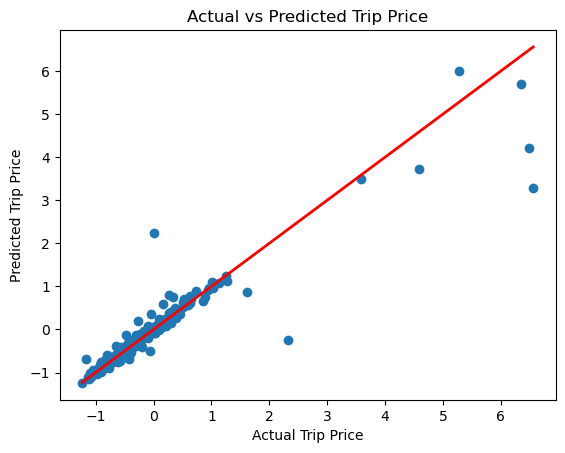

In [150]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs Predicted Trip Price')
plt.show()


A **residual plot** helps you check if there is any pattern in the residuals (errors), which could suggest the need for a better model.

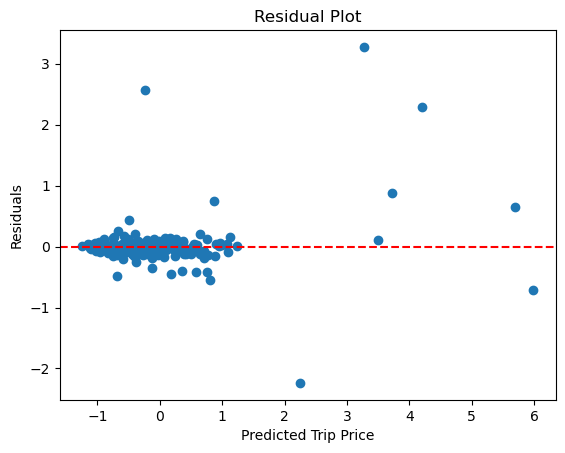

In [151]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Trip Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**Learning Curve (For Overfitting/Underfitting Check)**
A learning curve shows how the model performance changes as the training size increases. It helps you detect overfitting or underfitting

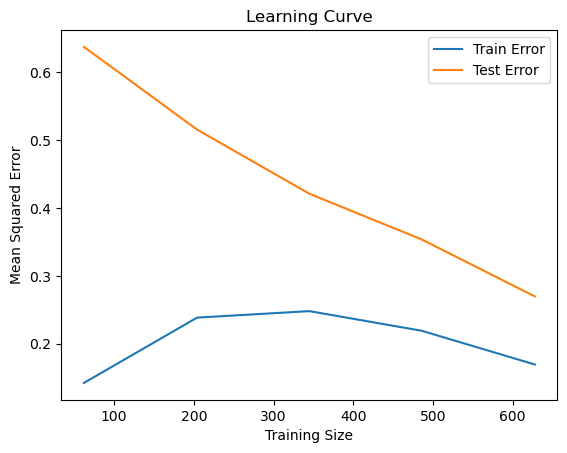

In [152]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVR(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train Error')
plt.plot(train_sizes, test_scores_mean, label='Test Error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


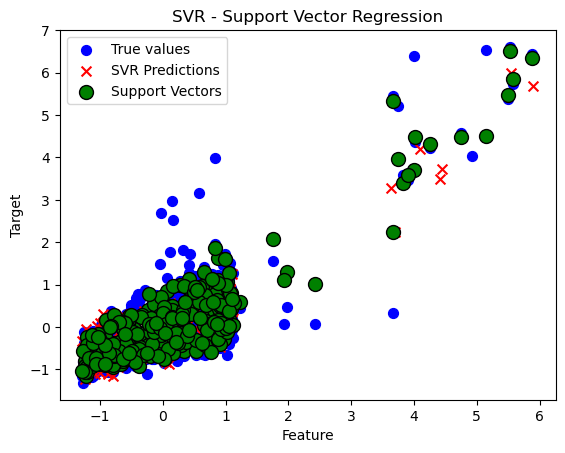

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import pandas as pd

#Plotting the graph of Support Vectors
best_svm.fit(X_train, y_train)

# Find support vectors
sv = best_svm.support_vectors_

# Make predictions on the test set using X_test
y_pred = best_svm.predict(X_test)


# Plot predictions 
plt.scatter(X_train.iloc[:, 0], y_train, c='blue', label="True values", s=50, marker='o')  # usa .iloc per accedere alle colonne
plt.scatter(X_test.iloc[:, 0], y_pred, c='red', label="SVR Predictions", s=50, marker='x')

# Plot the support vectors in a 2D space
plt.scatter(sv[:, 0], best_svm.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

plt.xlabel("Feature") 
plt.ylabel("Target")
plt.title("SVR - Support Vector Regression")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


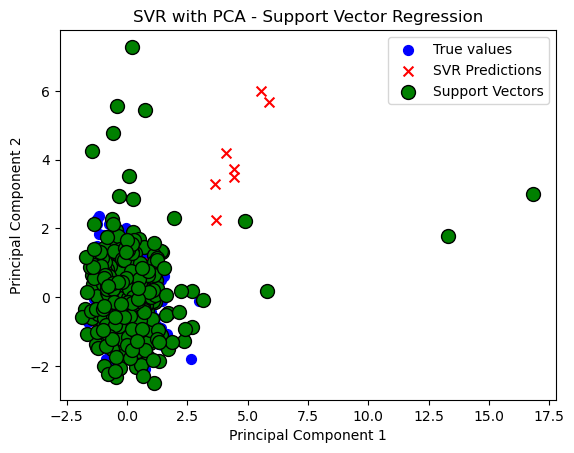

In [154]:
from sklearn.decomposition import PCA

# Apply PCA to reduce predictors space
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Predict using PCAs
y_pred = best_svm.predict(X_test)

# Extract the Support Vector from the new 2D
sv = best_svm.support_vectors_
sv_2d = pca.transform(sv)

# Plot the data
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='blue', label="True values", s=50, marker='o')
plt.scatter(X_test.iloc[:, 0], y_pred, c='red', label="SVR Predictions", s=50, marker='x')

# Plot support vectors in the 2D space
plt.scatter(sv_2d[:, 0], sv_2d[:, 1], color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

plt.xlabel('PC1 ({}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title("SVR with PCA - Support Vector Regression")
plt.legend()
plt.show()


In [ ]:
# Loadings (how each variabile contributes to the PCA)
loadings = pd.DataFrame(pca.components_.T,  
                        columns=['PC1', 'PC2'],  
                        index=X_train.columns)  

print("Loadings of PCA:")
print(loadings)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


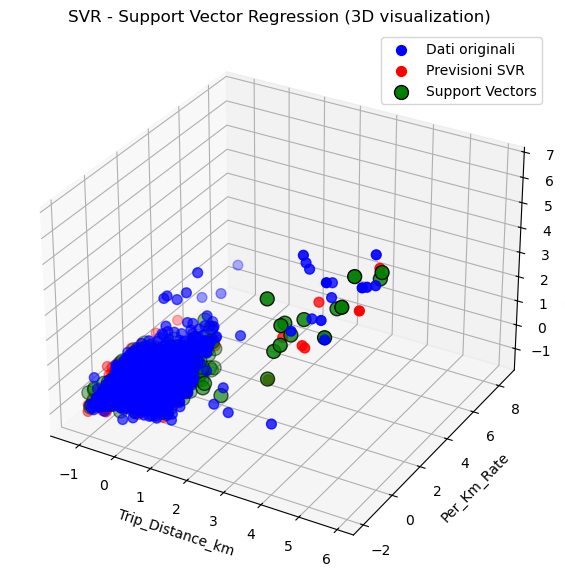

In [155]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Create a 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Set up the name of the two features to plot
feature_1 = 'Trip_Distance_km'  
feature_2 = 'Per_Km_Rate'  

# Scatter plot of training values (X_train e y_train)
ax.scatter(X_train[feature_1], X_train[feature_2], y_train, c='blue', label="Dati originali", s=50)

# Scatter plot of predictions (X_test e y_pred)
ax.scatter(X_test[feature_1], X_test[feature_2], y_pred, c='red', label="Previsioni SVR", s=50)

# Plot support vectors
ax.scatter(sv[:, 0], sv[:, 1], best_svm.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

# Set up labels and title
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel("Target/Trip Price")
ax.set_title("SVR - Support Vector Regression (3D visualization)")
ax.legend()

# Show the plot
plt.show()
